# Analysis of the percentage of the Protein-coding Genes and Pseudogenes Coverage in Each Strand of E. coli                            
                            Final Project
                 BIOF309 – Introduction to Python Programming

The E. coli chromosome is a circular double-stranded DNA, 4.6 × 106 in length.
Protein-coding genes carry genetic information that have the ability to code for a protein.
Pseudogenes are genomic DNA sequences similar to normal genes but they have lost their protein-coding ability. 


The identification of pseudogenes is a very important step for:  

* the accurate identification and annotation of the functional genes 
* the evolutionary analysis of genomes and functional genes 
* the determination of the function of the pseudogenes 



# Reseach questin

1) What are the Percentage of protein-coding and pseudo-gene coverage on the positive (sense) and the negative (antisense) strands in Escherichia coli?


# Source data sets 

The publicly available data that were used in this project were downloaded from the NCBI (https://www.ncbi.nlm.nih.gov/nuccore/CP014225.1) and included the complete genome of Escherichia coli str. K-12 substr. MG1655, complete genome.

In [74]:
# Importing packages I plan on using
import csv 
import numpy as np
import matplotlib 
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
# shows images in notebook
%matplotlib inline 

# The Data

In [75]:
import pandas as pd
df = pd.read_csv('sequence.gff3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,CP014225.1,Genbank,region,1,4659625,.,+,.,ID=id0;Dbxref=taxon:511145;Is_circular=true;Na...
1,CP014225.1,Genbank,pseudogene,1,1308,.,+,.,ID=gene0;Name=AW869_00010;gbkey=Gene;gene_biot...
2,CP014225.1,Protein Homology,CDS,1,1308,.,+,0,ID=cds0;Parent=gene0;Note=frameshifted%3B inco...
3,CP014225.1,Genbank,gene,1586,1693,.,+,.,ID=gene1;Name=AW869_00015;gbkey=Gene;gene_biot...
4,CP014225.1,Protein Homology,CDS,1586,1693,.,+,0,ID=cds1;Parent=gene1;Dbxref=NCBI_GP:AMC94701.1...


# Provide a detailed description of the E. coli dataset:

In [2]:
 
# inputting the length of e. coli
inputfile ='sequence.gff3.csv'
Length = 4659625

#Calculate coding gene coverage on e.coli
print("The filename for E. coli is " + inputfile)
print("The length of E. coli genome is " + str(Length))

The filename for E. coli is sequence.gff3.csv
The length of E. coli genome is 4659625


In [10]:
# open and read the .gff3 file, delimited with ","
# formatted for gff3 file and select necessary columns

col_num_source = 1 # indicates the source of DNA sequence information
col_num_start = 3 # indicates the start position of a gene
col_num_end = 4 # indicates the end position of a gene
col_num_strand = 6 # indicates the location of the genes on the sense(+) or antisense(-) strands.
col_num_desc = 8 # provides additional information about the gene
cols_cellformat = [] # all selected columns are stored in 'cols_cellformat'

f = open( inputfile, 'r' ) # open the file in read format
for line in f:
    cells = line.split( "," ) 
    cols_cellformat.append( ( cells[ col_num_start ], 
                             cells[ col_num_end ], 
                             cells[ col_num_strand ] , 
                             cells [ col_num_desc ], 
                             cells [ col_num_source ] ) ) 


In [11]:
# Data type conversion
import numpy as np

cols = np.asarray(cols_cellformat) # convert cell to array. Store the result in a new variable, cols.
start_end = cols[:,0:2].astype(int) # select the start and end positions from 'cols' and save as integers.
strand_is_forward = cols[:,2] == '+' # select (+/-) strands and convert to Boolean. (+) strand == True 
description = cols[:,3] # select gene description from 'cols'
is_homology = cols[:,4] == 'Protein Homology' # select the source of DNA sequence information and convert to Boolean.

In [17]:
# An example of getting information from the specific raw in dataset


rowNumber = 4 # an example of a gene information
print("The #4th raw of the Dataset contains the following information: ")
print("Start position of the gene: " + str(start_end[rowNumber-1,0]))
print("End position of the gene: " + str(start_end[rowNumber-1,1]))
print("Gene is located on forward strand== " + str(strand_is_forward[rowNumber-1]))
print("DNA sequance are obtained from Genbank== " + str(not (is_homology[rowNumber-1])))
print("Gene description: " + description[rowNumber-1])

The #4th raw of the Dataset contains the following information: 
Start position of the gene: 1586
End position of the gene: 1693
Gene is located on forward strand== True
DNA sequance are obtained from Genbank== True
Gene description: ID=gene1;Name=AW869_00015;gbkey=Gene;gene_biotype=protein_coding;locus_tag=AW869_00015



In [21]:
# coverage and the percentage of genes and pseudogene on each strand

pcf = 0 # protein_coding_forward on (+) strand 
pcr = 0 # protein_coding_reverse on (-) strand
psf = 0 # pseudogene_forward on (-) strand 
psr = 0 # pseudogene_reverse on  (+) strand 
other = 0

for index in range (1,len(description)):
	if  not (is_homology[index]) : # ignoring the entire row in dataset that corresponds to'Protein Homology' 
		if ("gene_biotype=protein_coding" in description[index]) and strand_is_forward[index] :
			pcf += 1
		elif ("gene_biotype=protein_coding" in description[index]) and not strand_is_forward[index] :
			pcr += 1 
		elif ("gene_biotype=pseudogene" in description[index]) and strand_is_forward[index] :
			psf += 1
		elif ("gene_biotype=pseudogene" in description[index]) and not strand_is_forward[index] :
			psr += 1
		else :
			other += 1

#Calculate coding gene coverage on e.coli

print("The length of E. coli is " + str(Length))

total_genes = pcf + pcr + psf + psr    

print("Total Genes: "+ str(total_genes))

percent_genes = (pcf+pcr)/total_genes*100

percent_pseudo = (psf+psr)/total_genes*100

print(str(percent_genes) + "% are genes and "+str(percent_pseudo)+"% are pseudogenes")

# Round Percentage Values
print(str(round(percent_genes)) + "% are genes and "+str(round(percent_pseudo))+"% are pseudogenes")

The length of E. coli is 4659625
Total Genes: 4489
98.17331254176877% are genes and 1.8266874582312318% are pseudogenes
98% are genes and 2% are pseudogenes


In [22]:
# variable initialization 
protein_coding_forward = 0
protein_coding_reverse = 0
pseudogene_forward = 0
pseudogene_reverse = 0
other = 0

for index in range (1,len(description)):
	if  not is_homology[index] : # ignoring the entire row in dataset that corresponds to'Protein Homology'
		if ("gene_biotype=protein_coding" in description[index]) and strand_is_forward[index] :
			protein_coding_forward += start_end[index,1]-start_end[index,0] 
		elif ("gene_biotype=protein_coding" in description[index]) and not strand_is_forward[index] :
			protein_coding_reverse += start_end[index,1]-start_end[index,0] 
		elif ("gene_biotype=pseudogene" in description[index]) and strand_is_forward[index] :
			pseudogene_forward += start_end[index,1]-start_end[index,0] 
		elif ("gene_biotype=pseudogene" in description[index]) and not strand_is_forward[index] :
			pseudogene_reverse += start_end[index,1]-start_end[index,0] 
		else :
			other += start_end[index,1]-start_end[index,0]

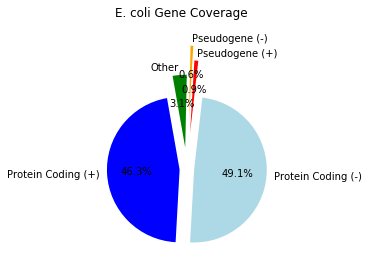

In [28]:
#A DNA coverage plot for E. coli 
import matplotlib.pyplot as plt

# shows images in notebook
%matplotlib inline 

labels = 'Protein Coding (+)', 'Protein Coding (-)','Pseudogene (+)','Pseudogene (-)','Other'
sizes = [protein_coding_forward,protein_coding_reverse,pseudogene_forward,pseudogene_reverse,other]
colors = ['blue', 'lightblue', 'red', 'orange', 'green']
explode = (0.1, 0.1, 0.5, 0.7, 0.3)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=100)
plt.suptitle('E. coli Gene Coverage')
plt.axis('equal')	
plt.show()	
plt.savefig('ecoli.png')